In [1]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter

In [2]:
df = pd.read_csv("violencia_interfamiliar.csv")

In [3]:
df.head()

,fecha_de_apertura,dia_de_apertura,fecha_ocurrencia_hechos,dia_ocurrencia,hora_militar_ocurrencia_hechos,conforman_unidad_domestica,fisica,verbal,economica,psicologica,...,parentesco_frente_a_la_victima,no_de_hijos_agresor,edad_agresor,estado_civil_agresor,escolaridad_agresor,ocupacion_agresor,corregimiento_agresor,comuna_agresor,barrio,tipo_vivienda
0,2022-06-01T00:00:00.000,jueves,29/12/2021,miércoles,9:35 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,23.0,soltero(a),bachiller completo,empleado,juanchito,comuna10,no,familiar
1,2022-07-01T00:00:00.000,viernes,2022-07-01T00:00:00.000,viernes,10:14 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna5,san pedro,alquilada
2,2022-11-01T00:00:00.000,martes,2022-06-01T00:00:00.000,miércoles,10:00 a.m.,si,si,si,no,si,...,hijo(a),2.0,23.0,casado(a),bachiller incompleto,independiente,ninguno,comuna1,no,alquilada
3,13/01/2022,jueves,13/01/2022,jueves,10:00 a.m.,si,no,si,no,si,...,ex-conyuge,1.0,37.0,soltero(a),bachiller completo,empleado,ninguno,comuna1,no,familiar
4,19/01/2022,miércoles,2022-12-01T00:00:00.000,miércoles,12:21 p.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna4,san cayetano,familiar


In [4]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  1000  filas y  36  columnas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha_de_apertura               1000 non-null   object 
 1   dia_de_apertura                 1000 non-null   object 
 2   fecha_ocurrencia_hechos         1000 non-null   object 
 3   dia_ocurrencia                  1000 non-null   object 
 4   hora_militar_ocurrencia_hechos  1000 non-null   object 
 5   conforman_unidad_domestica      1000 non-null   object 
 6   fisica                          1000 non-null   object 
 7   verbal                          1000 non-null   object 
 8   economica                       1000 non-null   object 
 9   psicologica                     1000 non-null   object 
 10  sexual                          1000 non-null   object 
 11  genero_m_f_victima              1000 non-null   object 
 12  edad_victima                    705

In [6]:
df.columns

Index(['fecha_de_apertura', 'dia_de_apertura', 'fecha_ocurrencia_hechos',
       'dia_ocurrencia', 'hora_militar_ocurrencia_hechos',
       'conforman_unidad_domestica', 'fisica', 'verbal', 'economica',
       'psicologica', 'sexual', 'genero_m_f_victima', 'edad_victima',
       'victima_conflicto_armado', 'etnia_victima', 'estado_civil_victima',
       'escolaridad_victima', 'corregimiento_victima', 'comuna_de_la_victima',
       'barrio_victima', 'ocupacion_victima', 'no_hijos_victima',
       'vivienda_victima', 'nucleo_familiar_victima',
       'numero_hermanos_victima', 'genero_agresor_m_f',
       'parentesco_frente_a_la_victima', 'no_de_hijos_agresor', 'edad_agresor',
       'estado_civil_agresor', 'escolaridad_agresor', 'ocupacion_agresor',
       'corregimiento_agresor', 'comuna_agresor', 'barrio', 'tipo_vivienda'],
      dtype='object')

In [7]:
df.isnull().sum()

fecha_de_apertura                   0
dia_de_apertura                     0
fecha_ocurrencia_hechos             0
dia_ocurrencia                      0
hora_militar_ocurrencia_hechos      0
conforman_unidad_domestica          0
fisica                              0
verbal                              0
economica                           0
psicologica                         0
sexual                              0
genero_m_f_victima                  0
edad_victima                      295
victima_conflicto_armado            0
etnia_victima                       0
estado_civil_victima                0
escolaridad_victima                 0
corregimiento_victima               2
comuna_de_la_victima                0
barrio_victima                      0
ocupacion_victima                   0
no_hijos_victima                  139
vivienda_victima                    0
nucleo_familiar_victima             0
numero_hermanos_victima           381
genero_agresor_m_f                  0
parentesco_f

In [8]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables.")


print("Las variables categoricas son: ")
print("*"*100)
for var in categoricas:
    print(var)


Hay  31  variables.
Las variables categoricas son: 
****************************************************************************************************
fecha_de_apertura
dia_de_apertura
fecha_ocurrencia_hechos
dia_ocurrencia
hora_militar_ocurrencia_hechos
conforman_unidad_domestica
fisica
verbal
economica
psicologica
sexual
genero_m_f_victima
victima_conflicto_armado
etnia_victima
estado_civil_victima
escolaridad_victima
corregimiento_victima
comuna_de_la_victima
barrio_victima
ocupacion_victima
vivienda_victima
nucleo_familiar_victima
genero_agresor_m_f
parentesco_frente_a_la_victima
estado_civil_agresor
escolaridad_agresor
ocupacion_agresor
corregimiento_agresor
comuna_agresor
barrio
tipo_vivienda


In [9]:
df.interpolate(method='linear', inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].interpolate(method='linear')
columns_to_fill_forward = ['no_hijos_victima', 'numero_hermanos_victima', 'edad_victima','corregimiento_victima']
for column in columns_to_fill_forward:
    df[column].fillna(method='ffill', inplace=True)


df.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\4132203702.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7480\4132203702.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7480\4132203702.py:6: FutureWarning: Series.fillna wi

fecha_de_apertura                 0
dia_de_apertura                   0
fecha_ocurrencia_hechos           0
dia_ocurrencia                    0
hora_militar_ocurrencia_hechos    0
conforman_unidad_domestica        0
fisica                            0
verbal                            0
economica                         0
psicologica                       0
sexual                            0
genero_m_f_victima                0
edad_victima                      0
victima_conflicto_armado          0
etnia_victima                     0
estado_civil_victima              0
escolaridad_victima               0
corregimiento_victima             0
comuna_de_la_victima              0
barrio_victima                    0
ocupacion_victima                 0
no_hijos_victima                  0
vivienda_victima                  0
nucleo_familiar_victima           0
numero_hermanos_victima           0
genero_agresor_m_f                0
parentesco_frente_a_la_victima    0
no_de_hijos_agresor         

In [10]:
df.duplicated().sum()

0

In [11]:
df.fisica.value_counts()

fisica
si           700
no           298
no aplica      2
Name: count, dtype: int64

In [12]:
df.verbal.value_counts()

verbal
si           967
no            29
n              2
no aplica      2
Name: count, dtype: int64

In [13]:
df.economica.value_counts()

economica
no           934
si            63
no aplica      3
Name: count, dtype: int64

In [14]:
df.psicologica.value_counts()

psicologica
si           833
no           164
no aplica      3
Name: count, dtype: int64

In [15]:
df.sexual.value_counts()

sexual
no           988
si             9
no aplica      3
Name: count, dtype: int64

In [16]:
df['escolaridad_victima'].unique()


array(['bachiller completo', 'primaria incompleta', 'pregrado',
       'primaria completa', 'técnico', 'bachiller incompleto',
       'no aplica', 'postgrado', 'tecnólogo', 'bachiller', 'tecnico',
       'primaria', 'quinto-bachillerato', 'no registro',
       'noveno-bachiller', 'quinto- primaria', 'sexto-bachiller',
       'estudiante estetica', 'profesional', 'tecnico profesional',
       'trcero-bachiller', 'tecnologa', 'bachillerato',
       'segundo bachiller', 'octavo-bachiller', 'tecnologo',
       'profesional incompleto', "bachiller incomp'leto", 'univeristario',
       '3 primaria', 'normalista', '5 primaria', '9 bachillerato',
       'hiletrada', 'estudiante', 'independiente', '6 bachillerato',
       '8 bachillerato', '7 bachillerato', 'tecnica diseño de modas',
       'secundaria', '2 primaria', 'profesional y tecnico',
       'bachiller tecnico', 'tecnica', '11 bachillerato', '4 primaria',
       'posgrado', '10 bachillerato', 'tecnologia', 'primaria completo',
       'd

In [17]:
df.genero_m_f_victima.value_counts()

genero_m_f_victima
femenino     614
f            230
masculino    114
m             41
no aplica      1
Name: count, dtype: int64

In [18]:
df['genero_m_f_victima'] = df['genero_m_f_victima'].replace({'f': 'femenino', 'm': 'masculino', 'no aplica':'otro'})
conteo = df['genero_m_f_victima'].value_counts()
print(conteo)

genero_m_f_victima
femenino     844
masculino    155
otro           1
Name: count, dtype: int64


In [19]:
df['verbal'] = df['verbal'].replace({'n': 'no', 'no aplica': 'no'})
conteo = df['verbal'].value_counts()
print(conteo)

verbal
si    967
no     33
Name: count, dtype: int64


In [20]:
df['economica'] = df['economica'].replace({'no aplica': 'no'})
conteo = df['economica'].value_counts()
print(conteo)

economica
no    937
si     63
Name: count, dtype: int64


In [21]:
df['psicologica'] = df['psicologica'].replace({'no aplica': 'no'})
conteo = df['psicologica'].value_counts()
print(conteo)

psicologica
si    833
no    167
Name: count, dtype: int64


In [22]:
df['fisica'] = df['fisica'].replace({'no aplica': 'no'})
conteo = df['fisica'].value_counts()
print(conteo)

fisica
si    700
no    300
Name: count, dtype: int64


In [23]:
df['sexual'] = df['sexual'].replace({'no aplica': 'no'})
conteo = df['sexual'].value_counts()
print(conteo)

sexual
no    991
si      9
Name: count, dtype: int64


In [24]:
df['genero_m_f_victima'] = df['genero_m_f_victima'].map({'otro': 2,'femenino': 1, 'masculino': 0})

0 es primaria, 1 es secundaria, 2 es bachillerato y 4 otro

In [25]:
df['escolaridad_victima']=df['escolaridad_victima'].map({    'primaria': 0, 'primaria incompleta': 0, 'primaria completa': 0, 
    'quinto- primaria': 0, '3 primaria': 0, '5 primaria': 0,
    'hiletrada': 0, '2 primaria': 0, '4 primaria': 0, 'primaria completo': 0,
    'trcero de primaria': 0, 'cuarto de primaria': 0,
    'primaria incompleta': 0, 'quinto-primaria': 0,
    'secundaria': 1, 'técnico': 1, 'tecnico': 1, 'tecnico profesional': 1, 
    'tecnólogo': 1, 'tecnologa': 1, 'tecnologo': 1, 
    'tecnica diseño de modas': 1, 'tecnica': 1, 'tecnologia': 1,
    'bachiller completo': 2, 'bachiller incompleto': 2, 'bachiller': 2,
    'quinto-bachillerato': 2, 'noveno-bachiller': 2, 'sexto-bachiller': 2, 
    'trcero-bachiller': 2, 'bachillerato': 2, 'segundo bachiller': 2, 
    'octavo-bachiller': 2, "bachiller incomp'leto": 2, '6 bachillerato': 2, 
    '8 bachillerato': 2, '7 bachillerato': 2, 'bachiller tecnico': 2,
    '11 bachillerato': 2, '10 bachillerato': 2, 'decimo- bachiller': 2, 
    'primero de bachiller': 2, 'quinto - bachiller': 2, 'septimo- bachiller': 2,
    'ninguno': 3, 'no aplica': 3, 'no registro': 3, 
    'pregrado': 4, 'postgrado': 4, 'profesional': 4, 
    'profesional incompleto': 4, 'univeristario': 4, 
    'estudiante estetica': 4, 'normalista': 4, 'estudiante': 4, 
    'independiente': 4, 'profesional y tecnico': 4, 'posgrado': 4})

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\1091878962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fisica', palette='Set2')


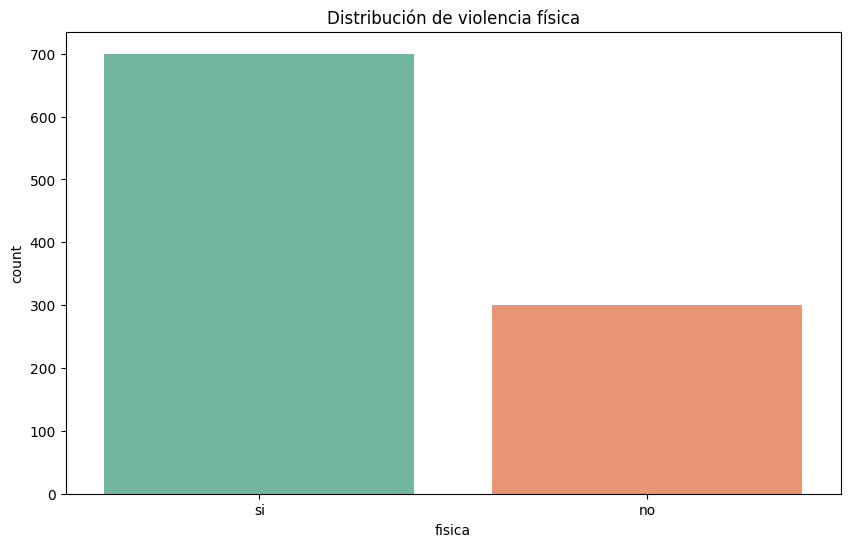

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\1091878962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='verbal', palette='Set2')


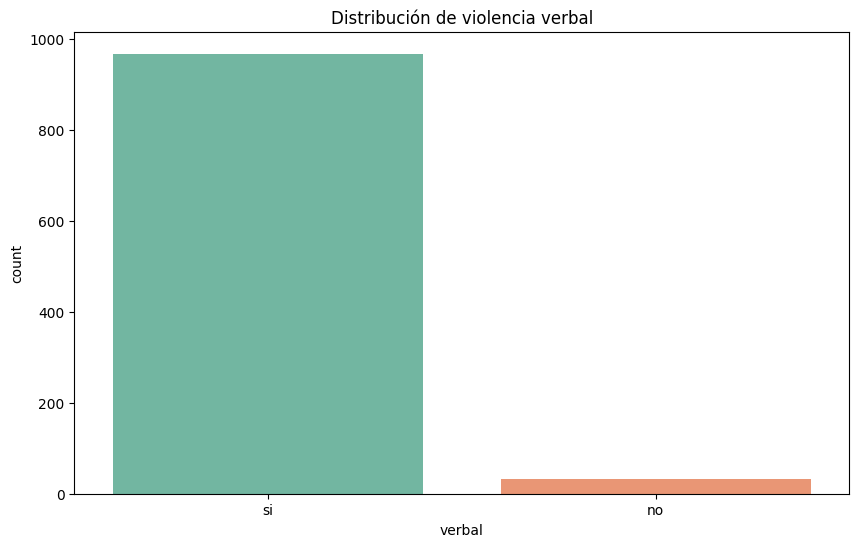

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\1091878962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='economica', palette='Set2')


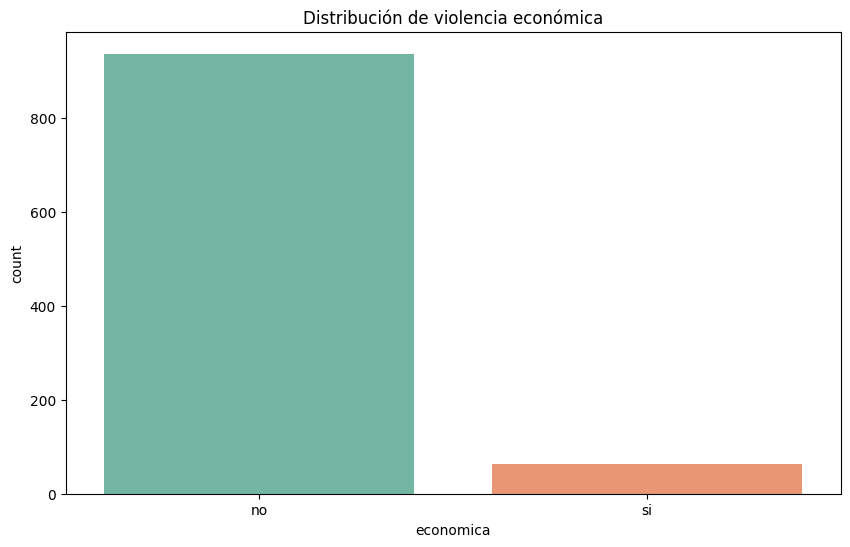

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\1091878962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='psicologica', palette='Set2')


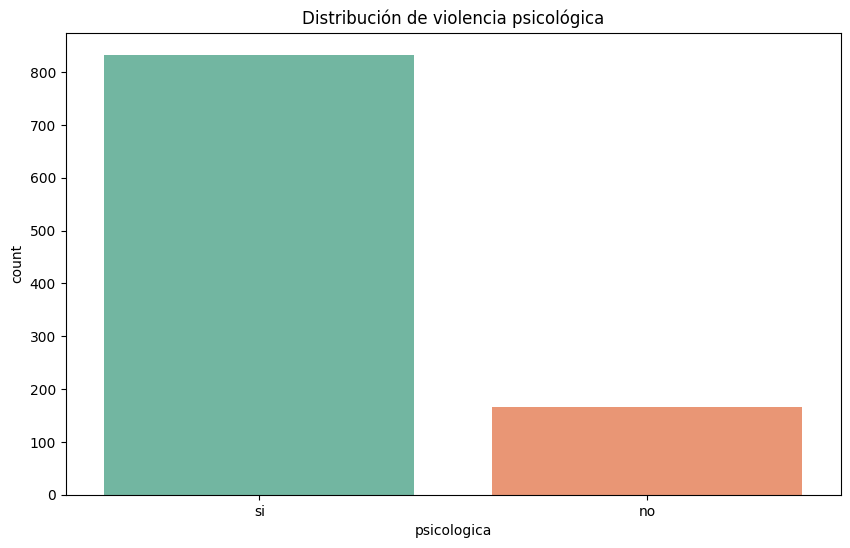

C:\Users\HP\AppData\Local\Temp\ipykernel_7480\1091878962.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sexual', palette='Set2')


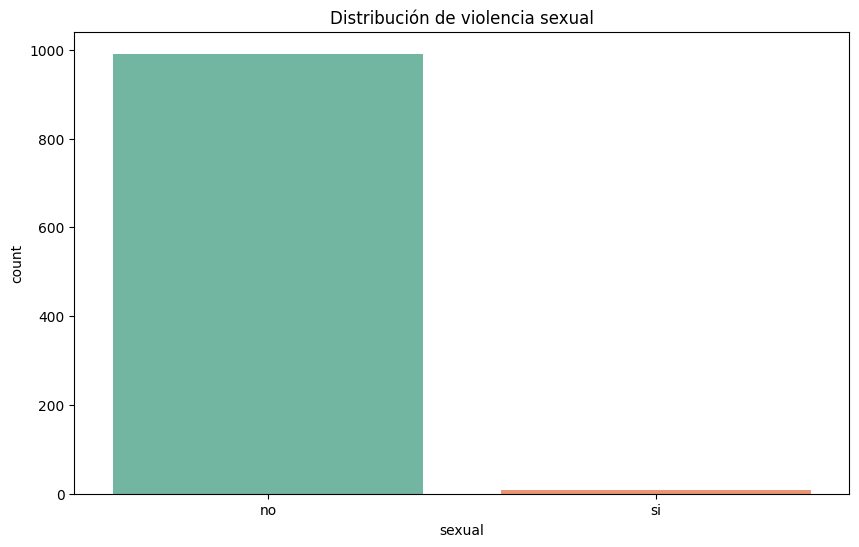

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fisica', palette='Set2')
plt.title('Distribución de violencia física')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='verbal', palette='Set2')
plt.title('Distribución de violencia verbal')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='economica', palette='Set2')
plt.title('Distribución de violencia económica')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='psicologica', palette='Set2')
plt.title('Distribución de violencia psicológica')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sexual', palette='Set2')
plt.title('Distribución de violencia sexual')
plt.show()


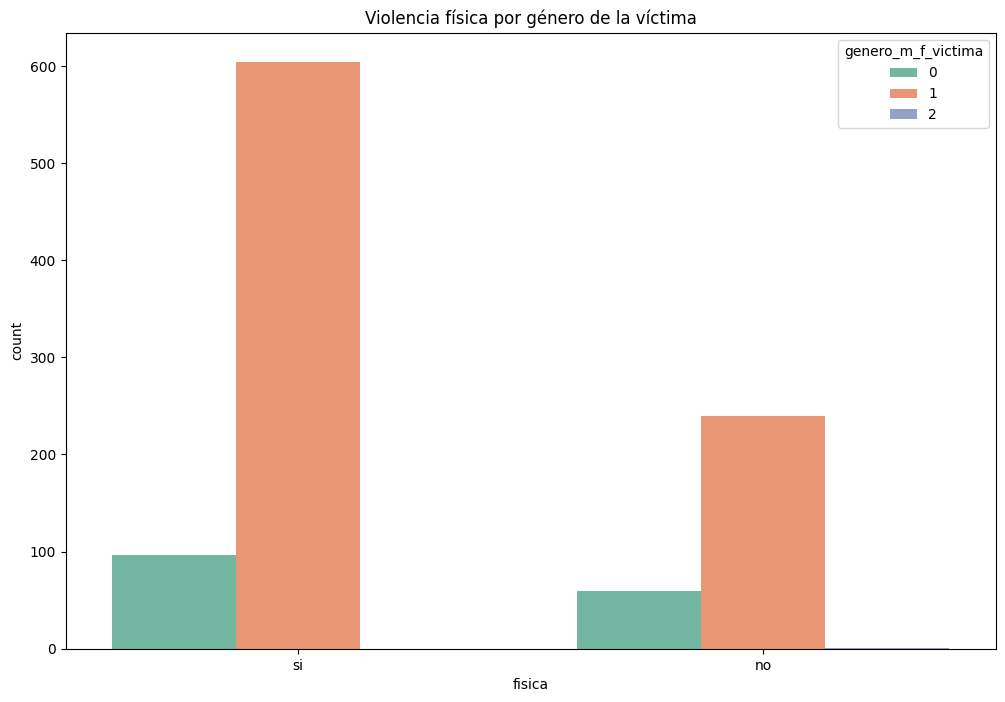

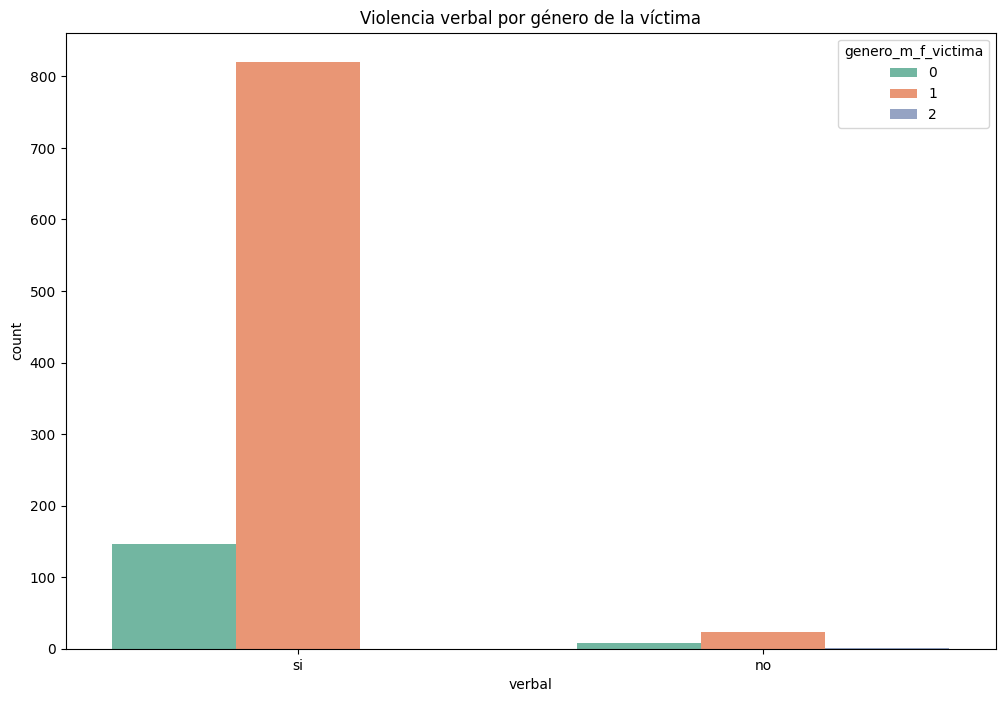

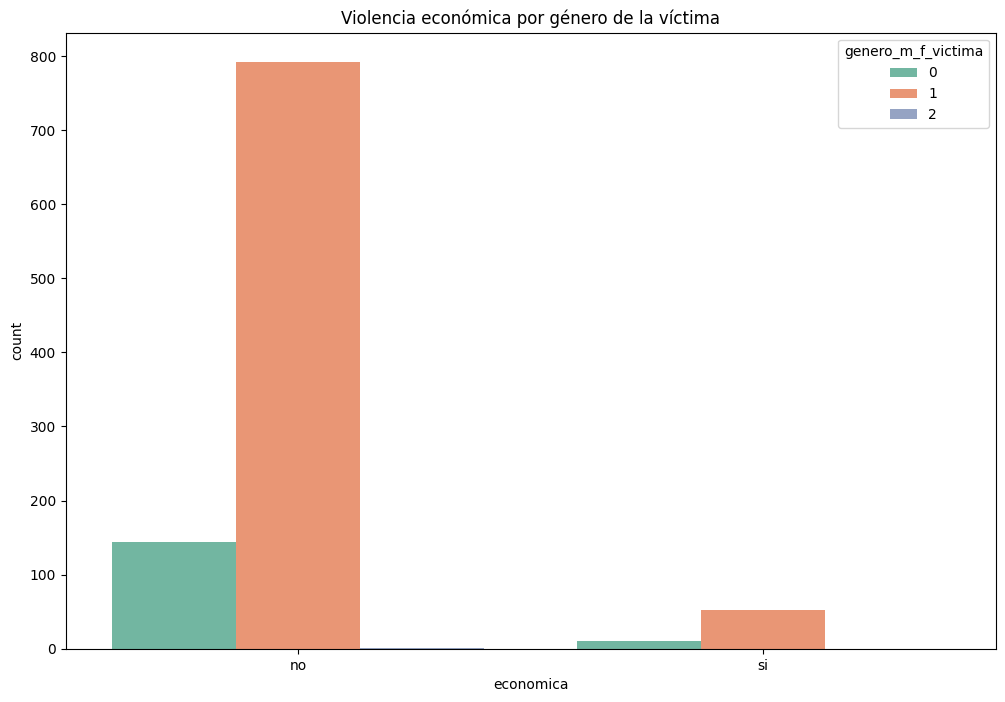

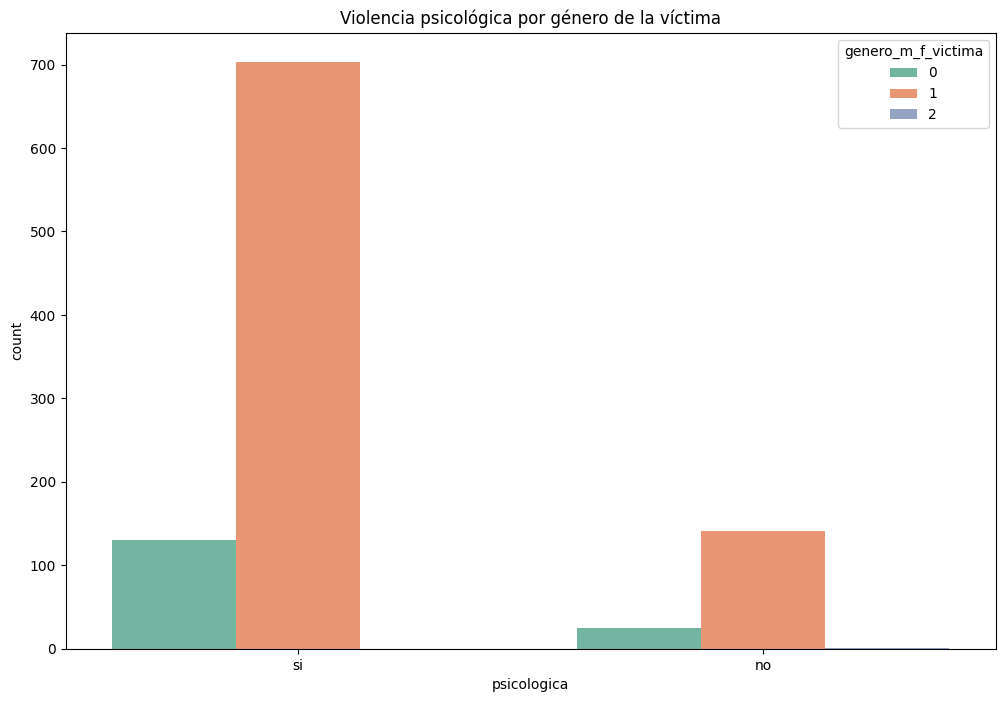

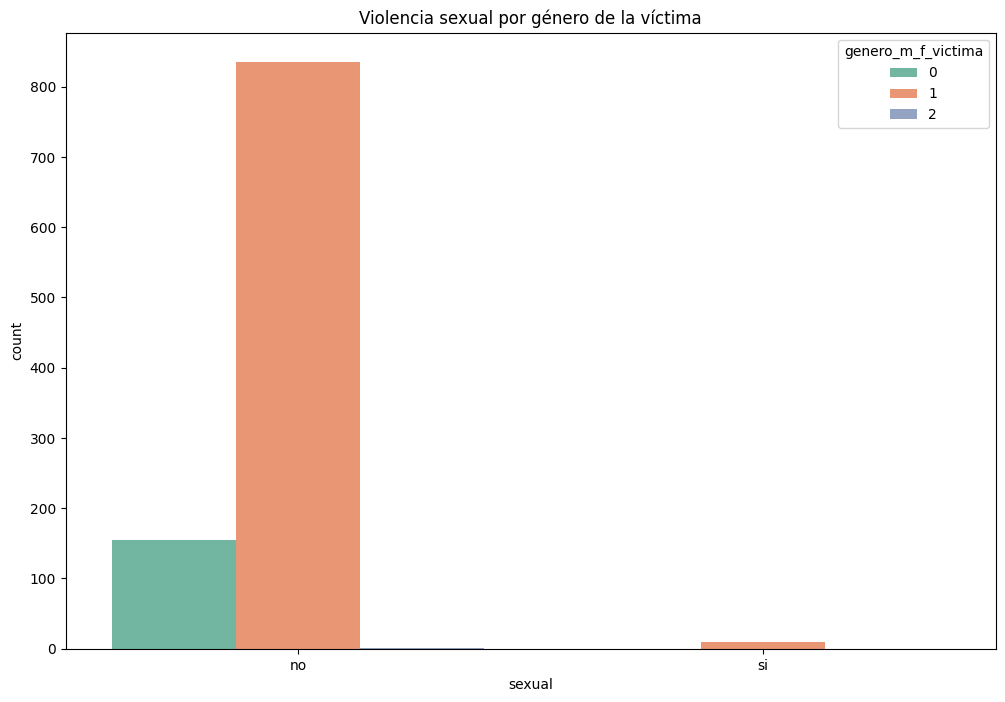

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='fisica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia física por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='verbal', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia verbal por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='economica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia económica por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='psicologica', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia psicológica por género de la víctima')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='sexual', hue='genero_m_f_victima', palette='Set2')
plt.title('Violencia sexual por género de la víctima')
plt.show()


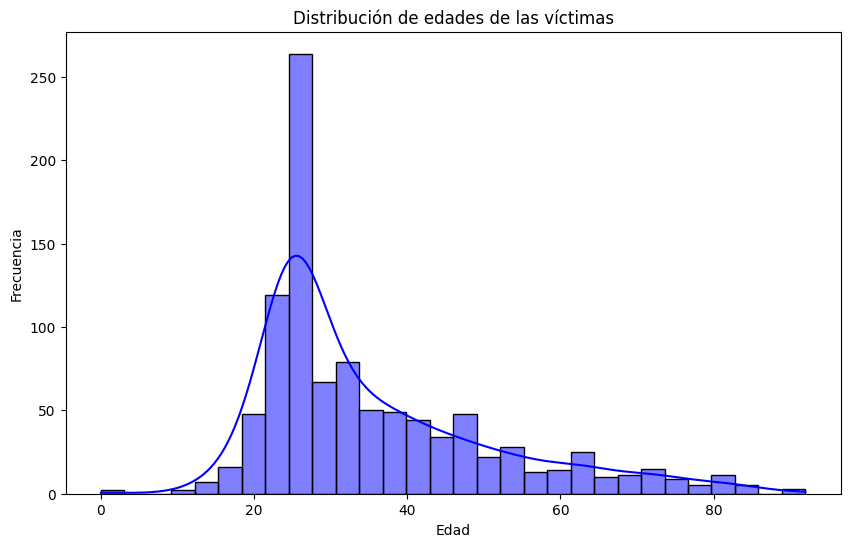

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad_victima', bins=30, kde=True, color='blue')
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


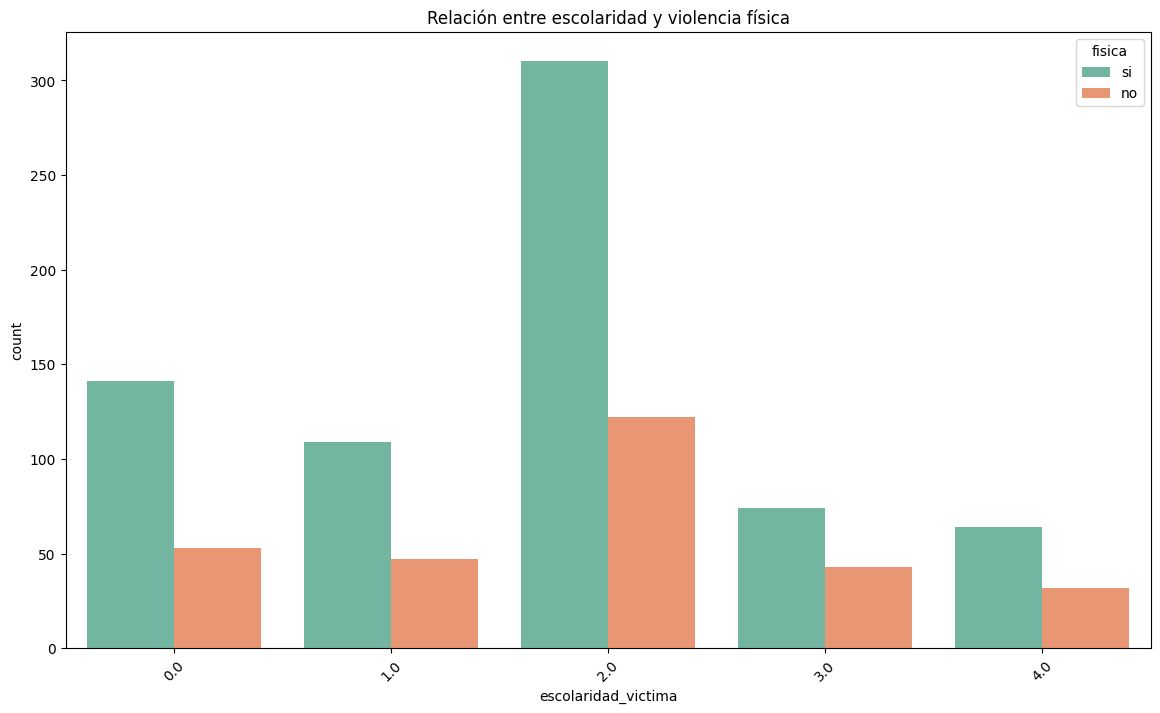

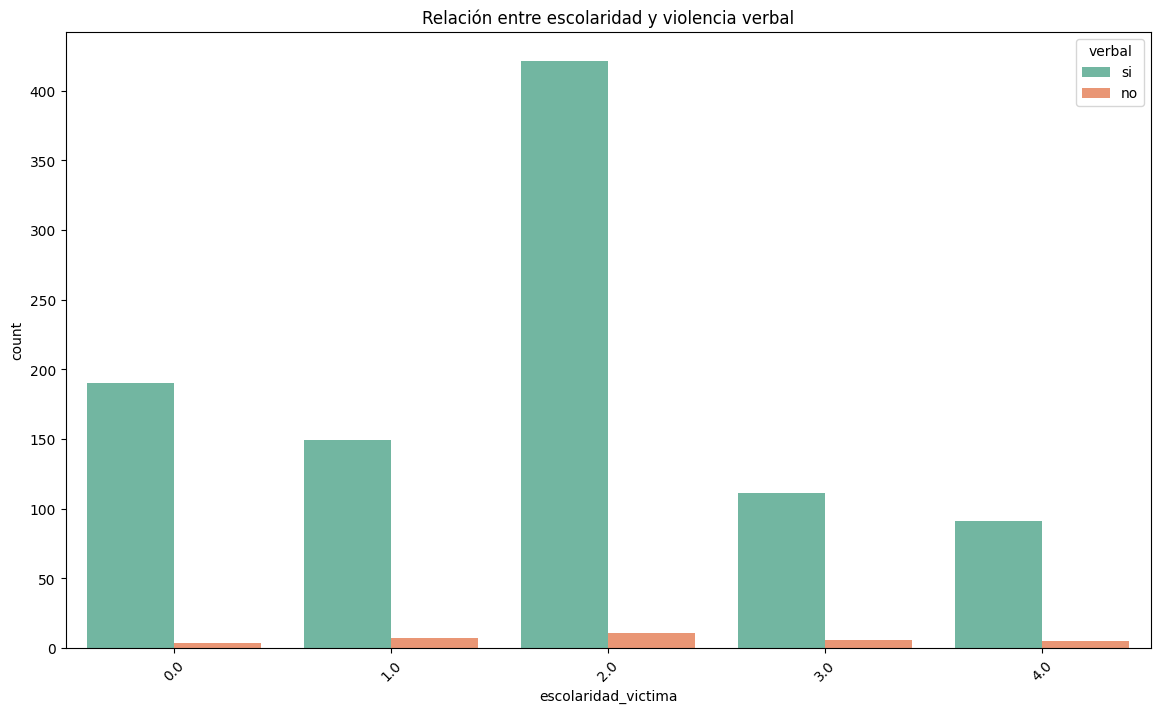

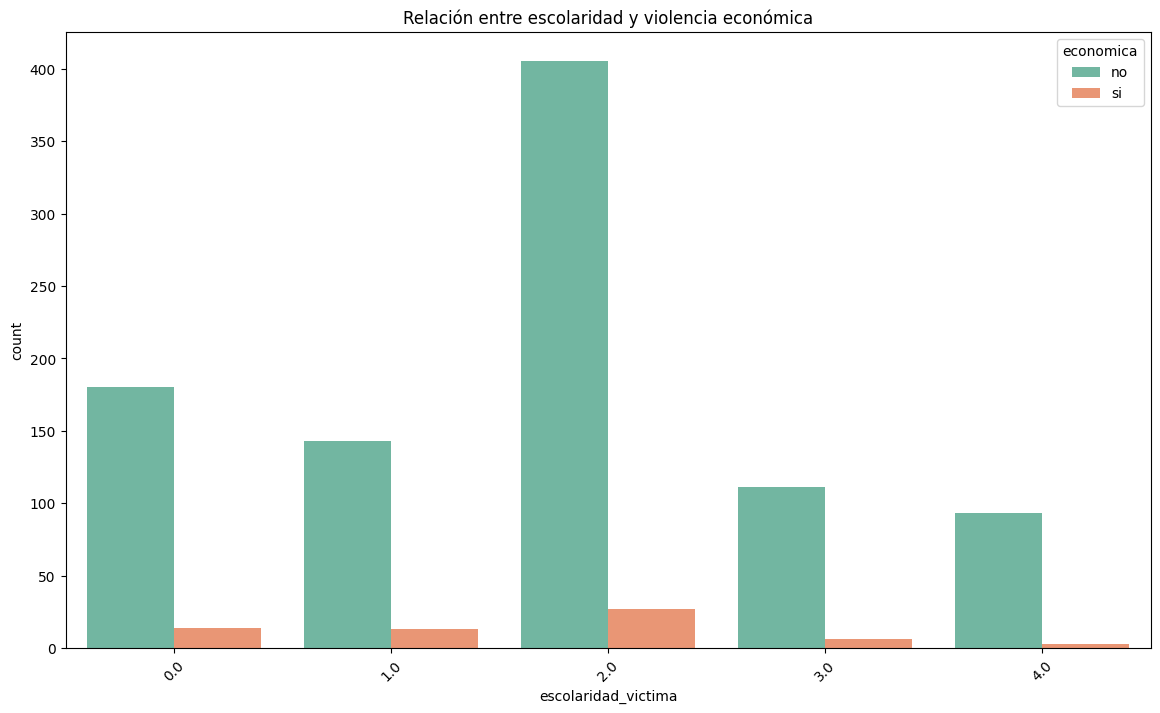

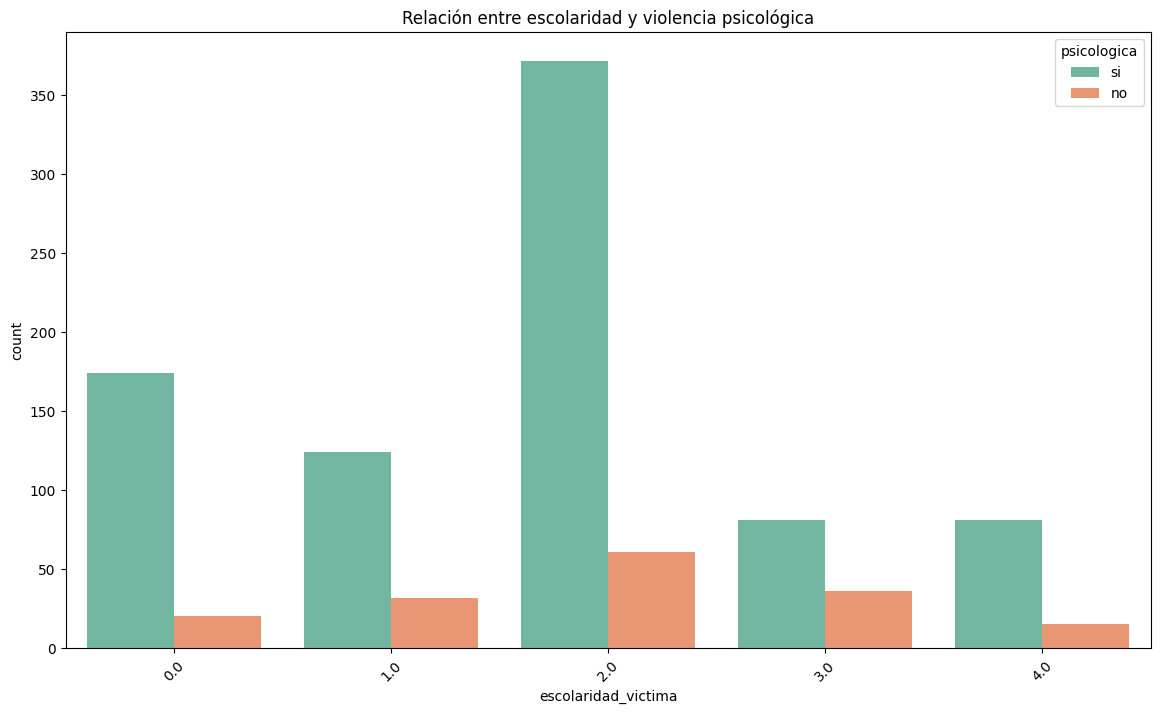

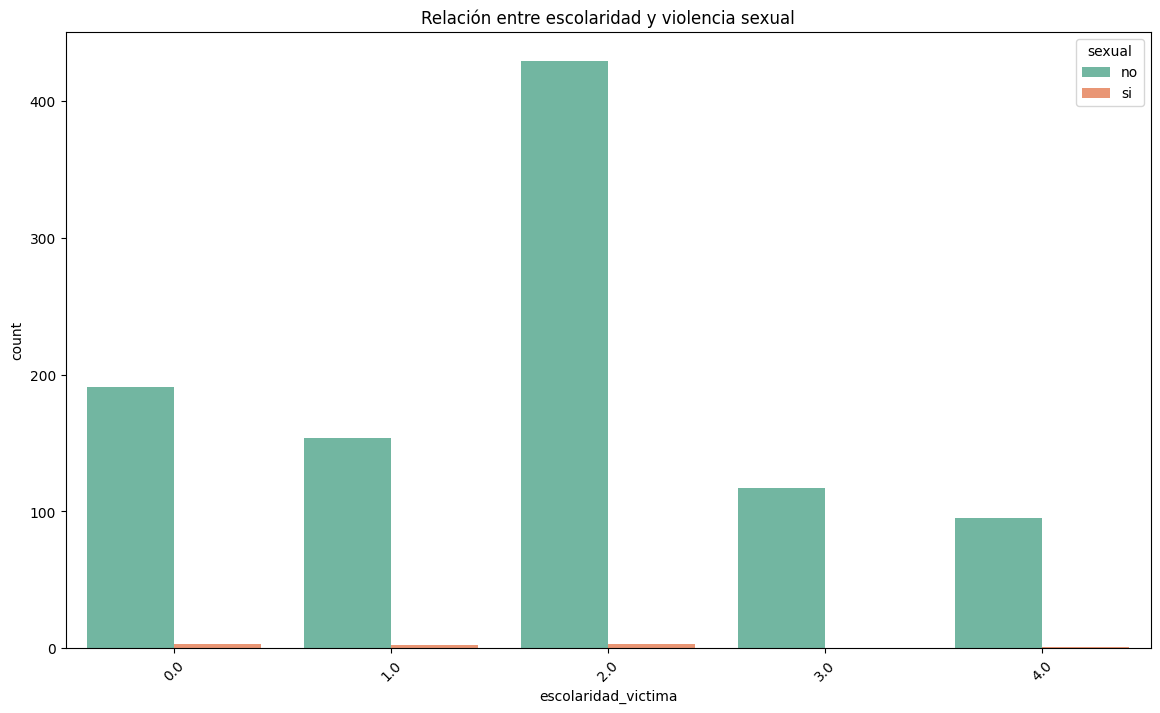

In [29]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='fisica', palette='Set2')
plt.title('Relación entre escolaridad y violencia física')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='verbal', palette='Set2')
plt.title('Relación entre escolaridad y violencia verbal')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='economica', palette='Set2')
plt.title('Relación entre escolaridad y violencia económica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='psicologica', palette='Set2')
plt.title('Relación entre escolaridad y violencia psicológica')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='escolaridad_victima', hue='sexual', palette='Set2')
plt.title('Relación entre escolaridad y violencia sexual')
plt.xticks(rotation=45)
plt.show()


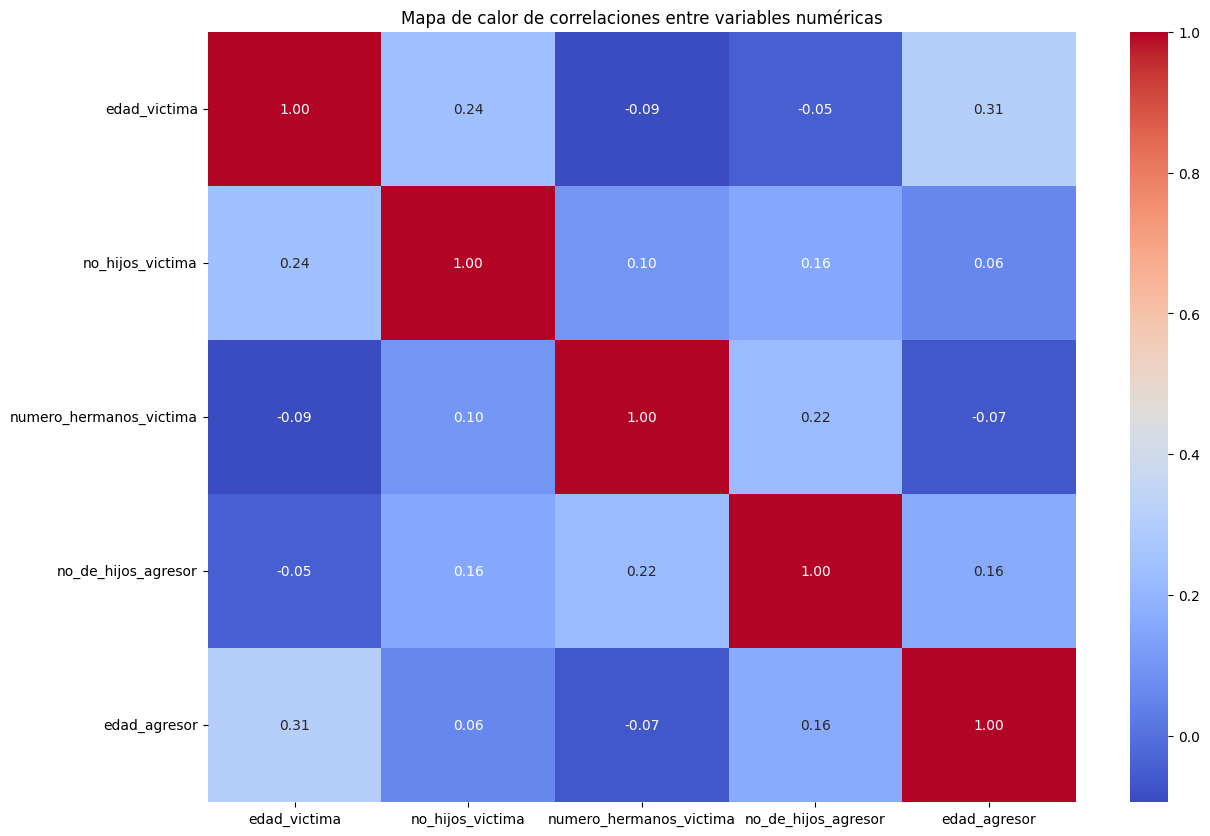

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import joblib


# Mapear las columnas de tipos de violencia a números binarios
df['verbal'] = df['verbal'].map({'si': 1, 'no': 0})
df['fisica'] = df['fisica'].map({'si': 1, 'no': 0})
df['economica'] = df['economica'].map({'si': 1, 'no': 0})
df['psicologica'] = df['psicologica'].map({'si': 1, 'no': 0})
df['sexual'] = df['sexual'].map({'si': 1, 'no': 0})

# Crear la variable objetivo multilabel
df['violencia'] = df.apply(lambda x: [label for label in ['fisica', 'psicologica', 'economica', 'verbal', 'sexual'] if x[label] == 1], axis=1)

# Verificar el contenido de la columna 'violencia'
print(df['violencia'].head(10))

0    [fisica, psicologica, verbal]
1    [fisica, psicologica, verbal]
2    [fisica, psicologica, verbal]
3            [psicologica, verbal]
4    [fisica, psicologica, verbal]
5    [fisica, psicologica, verbal]
6            [psicologica, verbal]
7    [fisica, psicologica, verbal]
8            [psicologica, verbal]
9            [psicologica, verbal]
Name: violencia, dtype: object


In [32]:
# Binarizar las etiquetas multilabel
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['violencia'])

# Verificar las dimensiones de y antes de la división
print(f"Dimensiones de y: {y.shape}")
print(f"Etiquetas únicas en y: {np.unique(y)}")

Dimensiones de y: (1000, 5)
Etiquetas únicas en y: [0 1]


In [33]:
# Asegurarse de que y no esté vacío
if y.size == 0:
    raise ValueError("y está vacío. Revisa la generación de etiquetas.")

# Usar las demás columnas como características, asegurándonos de que sean numéricas
X = df.drop(columns=['violencia', 'verbal', 'fisica', 'economica', 'psicologica', 'sexual'])

# Convertir variables categóricas a numéricas (si aplica)
X = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Verificar las dimensiones de X y y
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (1000, 2025)
Dimensiones de y: (1000, 5)


In [34]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de X_train y y_train
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (800, 2025)
Dimensiones de y_train: (800, 5)
Dimensiones de X_test: (200, 2025)
Dimensiones de y_test: (200, 5)


In [35]:
# Entrenar un clasificador multilabel con regresión logística
clf = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

              precision    recall  f1-score   support

   economica       0.67      0.33      0.44        12
      fisica       0.85      0.87      0.86       151
 psicologica       0.96      0.91      0.93       166
      sexual       1.00      0.50      0.67         2
      verbal       0.94      1.00      0.97       189

   micro avg       0.92      0.92      0.92       520
   macro avg       0.88      0.72      0.77       520
weighted avg       0.92      0.92      0.91       520
 samples avg       0.91      0.90      0.89       520



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


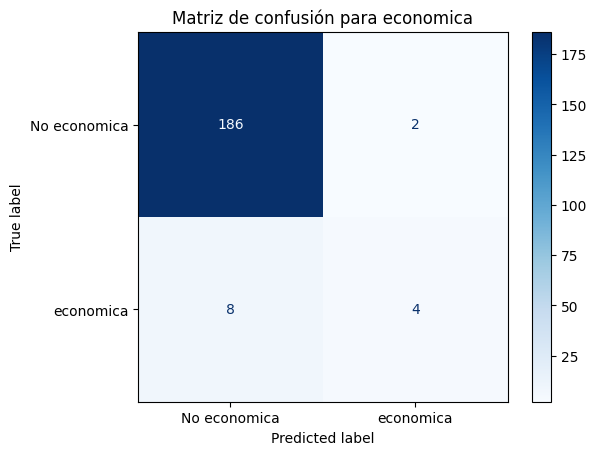

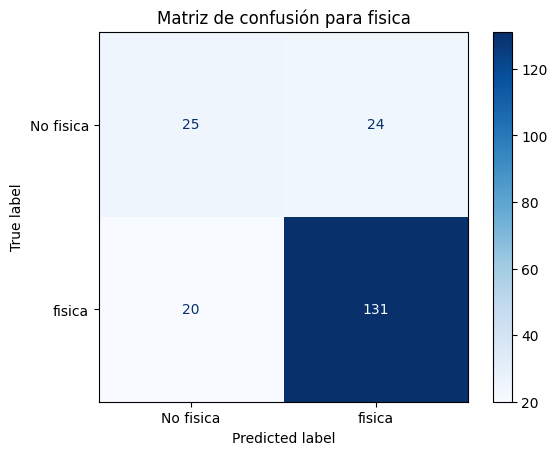

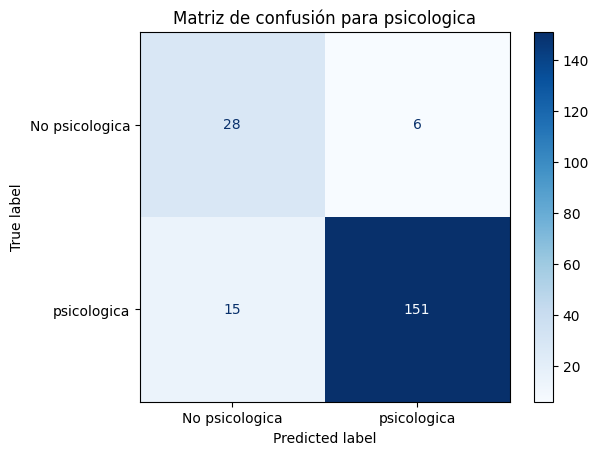

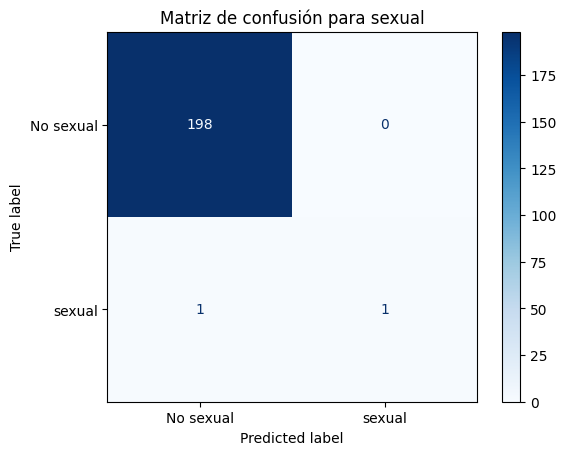

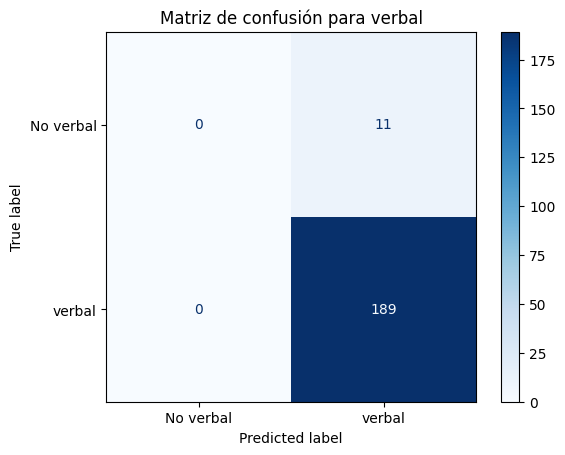

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Generar las matrices de confusión multilabel
mcm = multilabel_confusion_matrix(y_test, y_pred)

#Hacer una matriz de confusión por cada tipo de violencia
labels = mlb.classes_
for i, (label, matrix) in enumerate(zip(labels, mcm)):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[f'No {label}', label])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de confusión para {label}')
    plt.show()


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcular Precision, Recall y F1 Score para cada clase
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"Precision (Precisión): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy (Exactitud): 0.6700
Precision (Precisión): 0.9152
Recall (Sensibilidad): 0.9154
F1 Score: 0.9131


In [38]:
# Predicción en el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)

# Calcular Accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calcular Precision, Recall y F1 Score para cada clase en el conjunto de entrenamiento
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Métricas en el conjunto de entrenamiento:")
print(f"Accuracy (Exactitud): {train_accuracy:.4f}")
print(f"Precision (Precisión): {train_precision:.4f}")
print(f"Recall (Sensibilidad): {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"Precision (Precisión): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Métricas en el conjunto de entrenamiento:
Accuracy (Exactitud): 0.9575
Precision (Precisión): 0.9908
Recall (Sensibilidad): 0.9912
F1 Score: 0.9908

Métricas en el conjunto de prueba:
Accuracy (Exactitud): 0.6700
Precision (Precisión): 0.9152
Recall (Sensibilidad): 0.9154
F1 Score: 0.9131


# Ajustar modelo

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np



# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seleccionar características importantes para cada etiqueta
selected_features = np.zeros(X_train_scaled.shape[1], dtype=bool)
for i in range(y_train.shape[1]):
    selector = SelectFromModel(estimator=LogisticRegression(random_state=42, max_iter=1000, C=0.1))
    selector.fit(X_train_scaled, y_train[:, i])
    selected_features = selected_features | selector.get_support()

X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Definir el modelo
model = LogisticRegression(random_state=42, max_iter=1000)

# Definir el espacio de hiperparámetros
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Usar MultiOutputClassifier para manejar múltiples clases o etiquetas
clf = MultiOutputClassifier(grid_search)
clf.fit(X_train_selected, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros para cada etiqueta:")
for i, est in enumerate(clf.estimators_):
    print(f"Etiqueta {i+1}: {est.best_params_}")

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test_selected)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"Precision (Precisión): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Mejores hiperparámetros para cada etiqueta:
Etiqueta 1: {'C': 1}
Etiqueta 2: {'C': 1}
Etiqueta 3: {'C': 0.1}
Etiqueta 4: {'C': 0.1}
Etiqueta 5: {'C': 0.01}
Accuracy (Exactitud): 0.7200
Precision (Precisión): 0.9155
Recall (Sensibilidad): 0.9462
F1 Score: 0.9300


# Matrices de confusion luego de ajustar el modelo

In [40]:
from sklearn.metrics import confusion_matrix

Matriz de confusión para Economica:
[[186   2]
 [  4   8]]
[[186   2]
 [  4   8]]


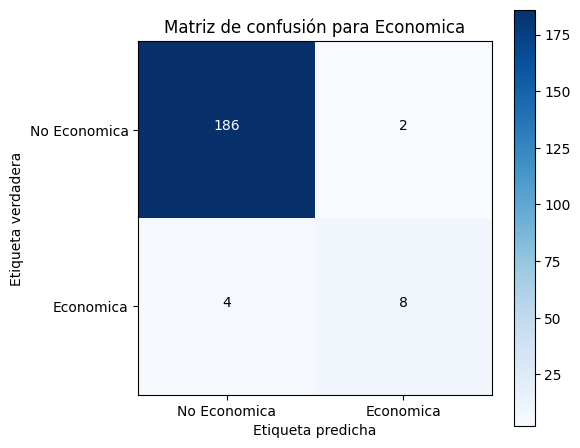

Matriz de confusión para Fisica:
[[ 29  20]
 [ 16 135]]
[[ 29  20]
 [ 16 135]]


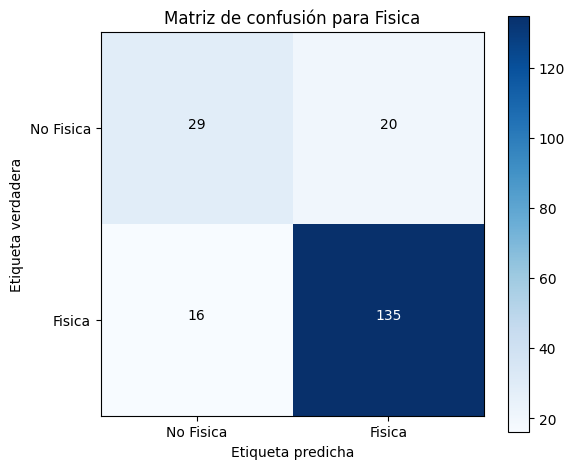

Matriz de confusión para Psicologica:
[[ 21  13]
 [  7 159]]
[[ 21  13]
 [  7 159]]


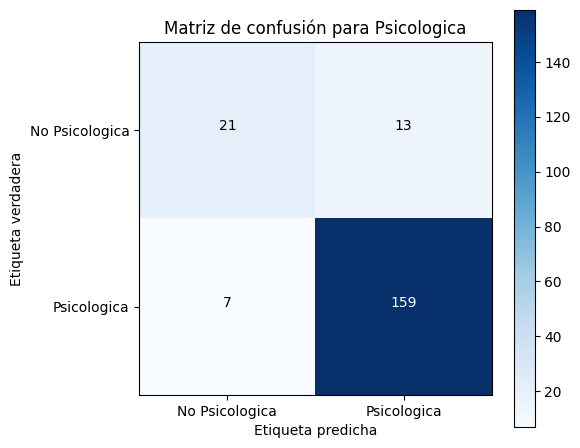

Matriz de confusión para Sexual:
[[198   0]
 [  1   1]]
[[198   0]
 [  1   1]]


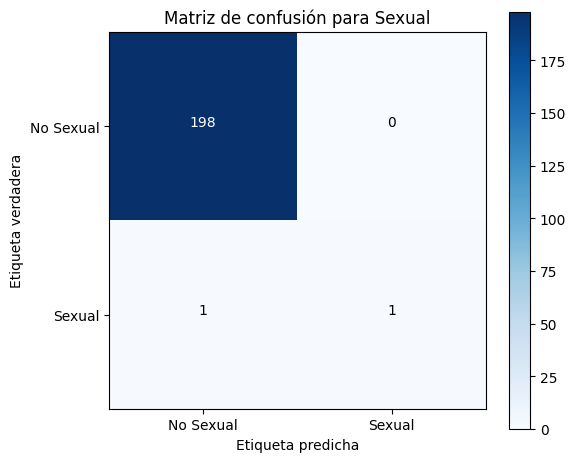

Matriz de confusión para Verbal:
[[  1  10]
 [  0 189]]
[[  1  10]
 [  0 189]]


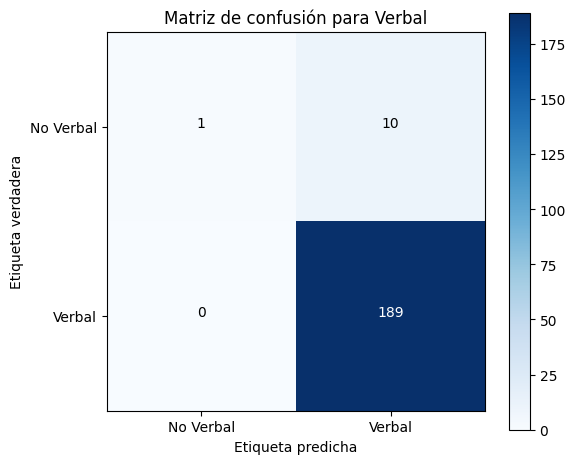

In [41]:
# Calcular y graficar la matriz de confusión para cada tipo de violencia
violence_types = ['Economica', 'Fisica', 'Psicologica', 'Sexual', 'Verbal']

# Iterar sobre cada tipo de violencia
for i, violence_type in enumerate(violence_types):
    # Calcular la matriz de confusión para el tipo de violencia actual
    conf_matrix = confusion_matrix(y_test[:, i], y_pred[:, i])
    
    # Imprimir la matriz de confusión
    print(f"Matriz de confusión para {violence_type}:")
    print(conf_matrix)
    
    # Función para graficar la matriz de confusión
    def plot_confusion_matrix(cm, classes,
                              title='Matriz de confusión',
                              cmap=plt.cm.Blues):
        """
        Esta función imprime y grafica la matriz de confusión.
        """
        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('Etiqueta verdadera')
        plt.xlabel('Etiqueta predicha')
        plt.tight_layout()

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 5))
    plot_confusion_matrix(conf_matrix, classes=[f"No {violence_type}", violence_type],
                          title=f'Matriz de confusión para {violence_type}')
    plt.show()
